# Business Problem

About:

● Walmart is an American multinational retail corporation that operates a chain of
supercenters, discount departmental stores, and grocery stores in the United States.
Walmart has more than 100 million customers worldwide.

Business Problem:


● The Management team at Walmart Inc. wants to analyze the customer purchase
behavior (precisely, purchase amount) against the customer’s gender and the various
other factors to help the business make better decisions. They want to understand if the
spending habits differ between male and female customers: Do women spend more on
Black Friday than men?

# Import Required Librabries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm

# Data Structure & Characteristics

In [ ]:
df=pd.read_csv("walmart_data.csv")
df1=df.copy()
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
cols=['User_ID','Occupation','Marital_Status','Product_Category']
df1[cols]=df1[cols].astype('object')
df1.dtypes

User_ID                       object
Product_ID                    object
Gender                        object
Age                           object
Occupation                    object
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                object
Product_Category              object
Purchase                       int64
dtype: object

In [ ]:
df1.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


INSIGHTS:

1. Data contains 550068 rows and 10 columns
2. No Missing Values
3. Unique 5891 user ids with 1001680 id with maximum transactions
4. Unique 3631 Product ids with P00265242 as the most selling product
5. Males are dominating the purchase with huge 414259 numbers
6. With 7 unique age groups, 26-35 is the group with maximum purchases
7. 21 unique occupations with 4 at the top
8. 3 unique city categories with B at the top
9. Customers with 1 year of stay in current city are the customers with maximum purchases
10. Customers with marital status 0 are the customers with most purchases
11. With 20 unique product categories 5 is at the top

# Outliers Detection & Clipping Data

**Used Boxplot To Detect Outliers**

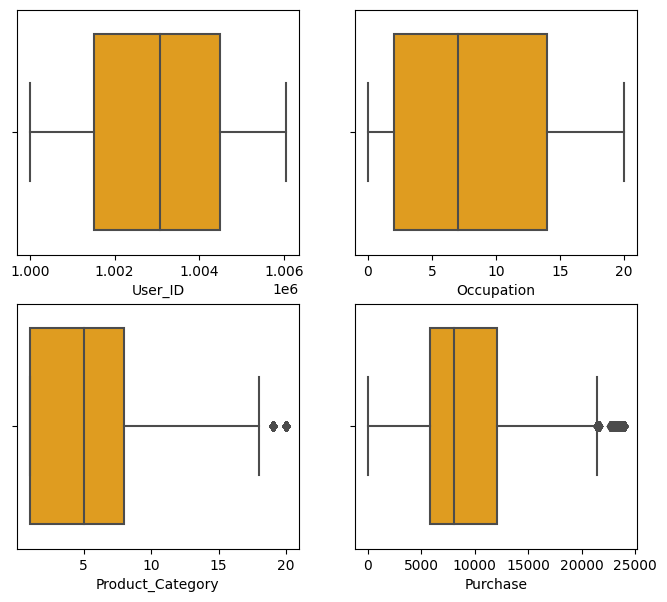

In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(8, 7))
#fig.subplots_adjust(top=1.0)
sns.boxplot(data=df1, x="User_ID", orient='h', ax=axis[0,0],color='orange')
sns.boxplot(data=df1, x="Occupation", orient='h', ax=axis[0,1],color='orange')
sns.boxplot(data=df1, x="Product_Category", orient='h', ax=axis[1,0],color='orange')
sns.boxplot(data=df1, x="Purchase", orient='h', ax=axis[1,1],color='orange')
plt.show()

INSIGHTS:

- User Id and Occupation have no outliers
- Purchase have got significant number of outliers
- Product Category has got a couple of outliers

**Clipping Data between 5 percentile and 95 percentile to handle outliers**

In [ ]:
percentile_5=df1['Purchase'].quantile(0.05)
percentile_95=df1['Purchase'].quantile(0.95)
df1['Purchase']=np.clip(df1['Purchase'],percentile_5,percentile_95)

In [ ]:
df1.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9256.710489
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4855.947166
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


INSIGHTS:

Clipping data between 5 percentile and 95 percentile has modified the data within this range to handle outliers for accurate representation of majority of data

1. In Purchase, maximum value is reduced from 23961 to 19336
2. Minimum value is changed to 1984 from 12
3. Standard Deviation is reduced to 4855 from 5023

# Univariate Analysis / Marginal Probability

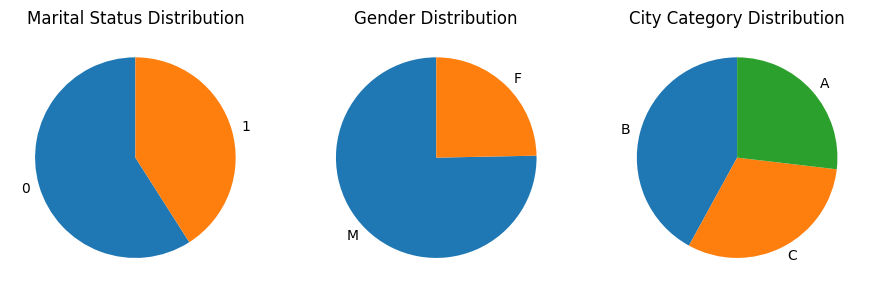

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (11, 4))
ax[0].pie(df1['Marital_Status'].value_counts(),labels=df1['Marital_Status'].value_counts().index,startangle=90)
ax[0].set_title("Marital Status Distribution")
ax[1].pie(df1['Gender'].value_counts(),labels=df1['Gender'].value_counts().index,startangle=90)
ax[1].set_title("Gender Distribution")
ax[2].pie(df1['City_Category'].value_counts(),labels=df1['City_Category'].value_counts().index,startangle=90)
ax[2].set_title("City Category Distribution")
plt.show()

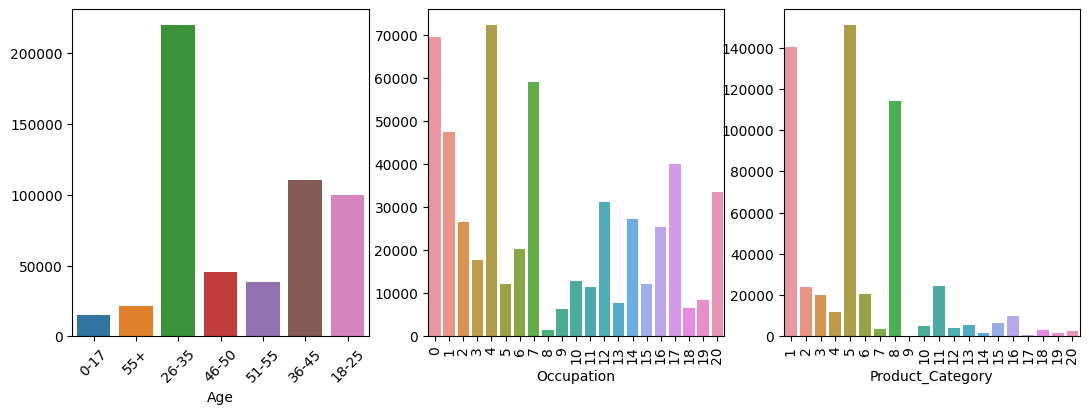

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(13, 3))
fig.subplots_adjust(top=1.2)
axis = axis.flatten()
sns.countplot(data=df1, x="Age", ax=axis[0])
axis[0].set_ylabel('')
axis[0].tick_params(axis='x', rotation=45)
sns.countplot(data=df1, x="Occupation", ax=axis[1])
axis[1].set_ylabel('')
axis[1].tick_params(axis='x', rotation=90)
sns.countplot(data=df1, x="Product_Category", ax=axis[2])
axis[2].set_ylabel('')
axis[2].tick_params(axis='x', rotation=90)
plt.show()

In [ ]:
df1['Gender'].value_counts(normalize=True)

M    0.753105
F    0.246895
Name: Gender, dtype: float64

In [ ]:
df1['Age'].value_counts(normalize=True)

26-35    0.399200
36-45    0.199999
18-25    0.181178
46-50    0.083082
51-55    0.069993
55+      0.039093
0-17     0.027455
Name: Age, dtype: float64

In [ ]:
df1['Occupation'].value_counts(normalize=True)

4     0.131453
0     0.126599
7     0.107501
1     0.086218
17    0.072796
20    0.061014
12    0.056682
14    0.049647
2     0.048336
16    0.046123
6     0.037005
3     0.032087
10    0.023506
5     0.022137
15    0.022115
11    0.021063
19    0.015382
13    0.014049
18    0.012039
9     0.011437
8     0.002811
Name: Occupation, dtype: float64

In [ ]:
df1['City_Category'].value_counts(normalize=True)

B    0.420263
C    0.311189
A    0.268549
Name: City_Category, dtype: float64

In [ ]:
df1['Stay_In_Current_City_Years'].value_counts(normalize=True)

1     0.352358
2     0.185137
3     0.173224
4+    0.154028
0     0.135252
Name: Stay_In_Current_City_Years, dtype: float64

In [ ]:
df1['Marital_Status'].value_counts(normalize=True)

0    0.590347
1    0.409653
Name: Marital_Status, dtype: float64

In [ ]:
df1['Product_Category'].value_counts(normalize=True)

5     0.274390
1     0.255201
8     0.207111
11    0.044153
2     0.043384
6     0.037206
3     0.036746
4     0.021366
16    0.017867
15    0.011435
13    0.010088
10    0.009317
12    0.007175
7     0.006765
18    0.005681
20    0.004636
19    0.002914
14    0.002769
17    0.001051
9     0.000745
Name: Product_Category, dtype: float64

INSIGHTS:

1. Customers with marital status 0 at 59% are higher than 1
2. 26-35 is the maximum buying age group with 40% share
3. Customers with occupation 4 are the maximum buyers (13%) followed by 0 and 7
4. Highest sold product category is 5 (27%) followed by 1 and 8
5. Males are clearly dominating the data with 75% of the purchases
6. Customers belonging to City catgeory B are at the top with 42%
7. Most of the customers are staying in the city for 1 year with 35%

# Multivariate Analysis / Conditional Probability

**Products Preferred By Different Age Groups**

In [ ]:
pd.crosstab(df1['Product_Category'], df1['Age'], normalize=True)

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Product_Category,,,,,,,
1,0.006517,0.049016,0.105894,0.050263,0.019041,0.016451,0.008019
2,0.001463,0.008050,0.016231,0.008930,0.003827,0.003238,0.001645
3,0.002182,0.008563,0.013929,0.007006,0.002502,0.001680,0.000885
4,0.001378,0.004478,0.007621,0.004279,0.001800,0.001233,0.000578
5,0.007872,0.051852,0.111755,0.053406,0.021763,0.017985,0.009757
6,0.000725,0.006816,0.015425,0.007088,0.002949,0.002636,0.001567
7,0.000096,0.000874,0.003001,0.001471,0.000594,0.000484,0.000244
8,0.004105,0.032561,0.080456,0.042351,0.019372,0.016980,0.011286
9,0.000029,0.000115,0.000280,0.000195,0.000060,0.000053,0.000015


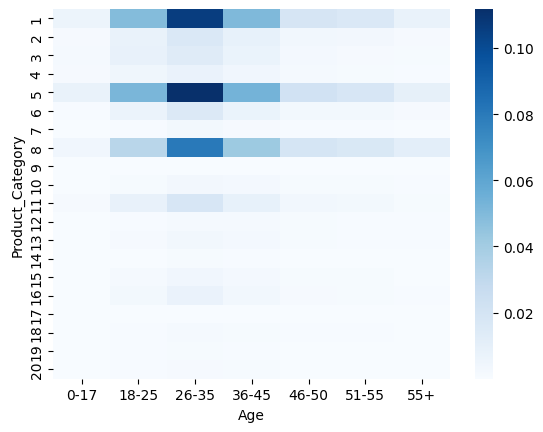

In [ ]:
sns.heatmap(pd.crosstab(df1['Product_Category'], df1['Age'], normalize=True),
            cmap='Blues')
plt.show()

INSIGHTS:

1. Age group 26-35 buys maximum products from category 5 followed by 1 and 8
2. Age group 36-45 buys most of the products from category 5 followed by 1 and 8
3. Age group 18-25 shows similar buying pattern as age group 36-45

**Relationship Between Age , Marital Status and Purchases**

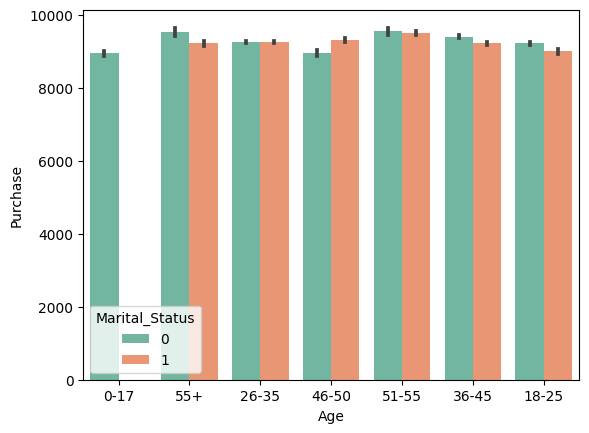

In [ ]:
sns.barplot(data=df1,x='Age',y='Purchase',hue='Marital_Status',palette='Set2')
#plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

INSIGHTS:

1. All the age groups show similar buying behaviour for males and females.
2. Age group 0-17 have only 0 bar which denotes singles for obvious reasons

**Product Categories preferred by different Genders**

In [ ]:
pd.crosstab(df1['Product_Category'], df1['Gender'], normalize=True)

Gender,F,M
Product_Category,,
1,0.045142,0.210059
2,0.010286,0.033098
3,0.010919,0.025828
4,0.006616,0.014751
5,0.076283,0.198106
6,0.008288,0.028918
7,0.001714,0.005050
8,0.061007,0.146104
9,0.000127,0.000618


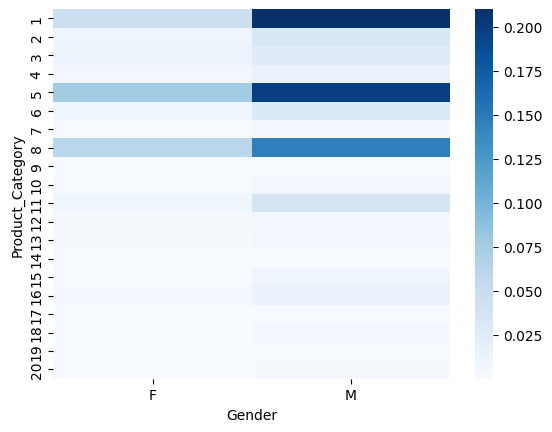

In [ ]:
sns.heatmap(pd.crosstab(df1['Product_Category'], df1['Gender'], normalize=True),
            cmap='Blues')
plt.show()

INSIGHTS:

1. Males are mostly purchasing product category 1 followed by 5 and 8
2. Females show preference to product category 5 followed by 8 and 1

# Gender Effect on Purchases - 95% Confidence Interval / CLT

In [ ]:
dfmen=df1[df1['Gender']=='M']['Purchase']
dfmen

4          7969
5         15227
6         19215
7         15854
8         15686
          ...  
550057     1984
550058     1984
550060     1984
550062     1984
550063     1984
Name: Purchase, Length: 414259, dtype: int64

In [ ]:
dfwomen=df1[df1['Gender']=='F']['Purchase']
dfwomen

0          8370
1         15200
2          1984
3          1984
14         5378
          ...  
550061     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 135809, dtype: int64

In [ ]:
m_mean=round(np.mean(dfmen),2)
f_mean=round(np.mean(dfwomen),2)
m_mean, f_mean

(9427.24, 8736.54)

In [ ]:
m_std=round(np.std(dfmen),2)
f_std=round(np.std(dfwomen),2)
m_std, f_std

(4925.95, 4596.97)

In [ ]:
mn=len(dfmen)
fn=len(dfwomen)
mn, fn

(414259, 135809)

**Male Data Confidence Interval & Distribution of Means**

In [ ]:
norm.interval(confidence=0.95, loc=m_mean, scale=m_std/np.sqrt(mn))

(9412.239625076156, 9442.240374923844)

In [ ]:
mn1=300
norm.interval(confidence=0.95, loc=m_mean, scale=m_std/np.sqrt(mn1))

(8869.826525322747, 9984.653474677252)

In [ ]:
mn2=3000
norm.interval(confidence=0.95, loc=m_mean, scale=m_std/np.sqrt(mn2))

(9250.970382155128, 9603.509617844871)

In [ ]:
mn3=30000
norm.interval(confidence=0.95, loc=m_mean, scale=m_std/np.sqrt(mn3))

(9371.498652532275, 9482.981347467725)

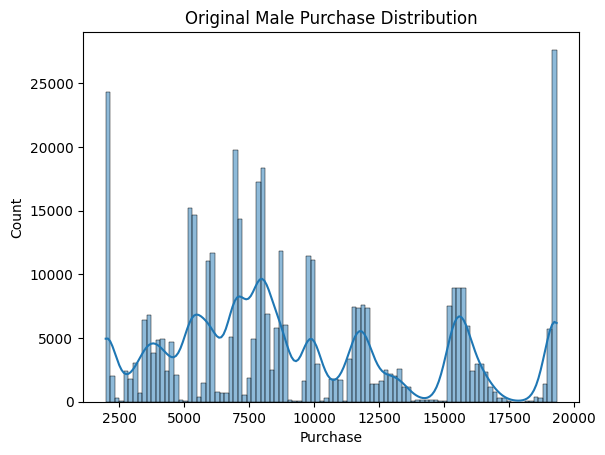

In [ ]:
sns.histplot(data=dfmen,kde=True).set_title("Original Male Purchase Distribution")
plt.show()

In [ ]:
sample_mean_300 = [np.mean(dfmen.sample(300)) for i in range(1000)]
np.mean(sample_mean_300)

9449.635993333331

In [ ]:
sample_mean_3000 = [np.mean(dfmen.sample(3000)) for i in range(1000)]
np.mean(sample_mean_3000)

9427.154584333332

In [ ]:
sample_mean_30000 = [np.mean(dfmen.sample(30000)) for i in range(1000)]
np.mean(sample_mean_30000)

9427.0332796

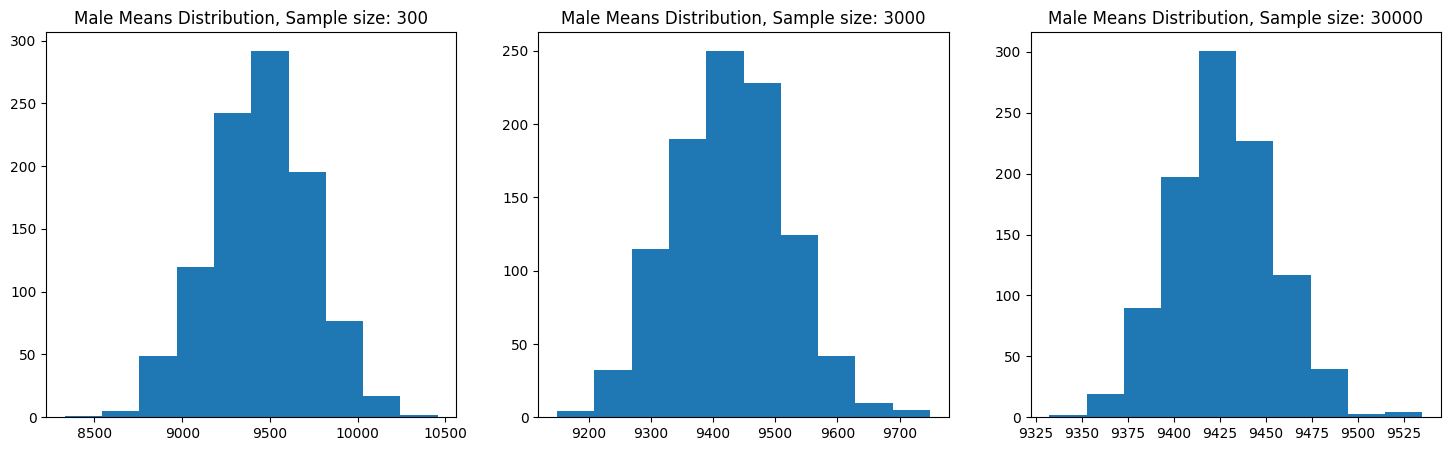

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axis[0].hist(sample_mean_300)
axis[1].hist(sample_mean_3000)
axis[2].hist(sample_mean_30000)
axis[0].set_title("Male Means Distribution, Sample size: 300")
axis[1].set_title("Male Means Distribution, Sample size: 3000")
axis[2].set_title("Male Means Distribution, Sample size: 30000")

plt.show()

**Female Data Confidence Interval & Distribution of Means**

In [ ]:
norm.interval(confidence=0.95, loc=f_mean, scale=f_std/np.sqrt(fn))

(8712.09131613775, 8760.988683862251)

In [ ]:
fn1=300
norm.interval(confidence=0.95, loc=f_mean, scale=f_std/np.sqrt(fn1))

(8216.353432802387, 9256.726567197615)

In [ ]:
fn2=3000
norm.interval(confidence=0.95, loc=f_mean, scale=f_std/np.sqrt(fn2))


(8572.042563943132, 8901.03743605687)

In [ ]:
fn3=30000
norm.interval(confidence=0.95, loc=f_mean, scale=f_std/np.sqrt(fn3))

(8684.52134328024, 8788.558656719762)

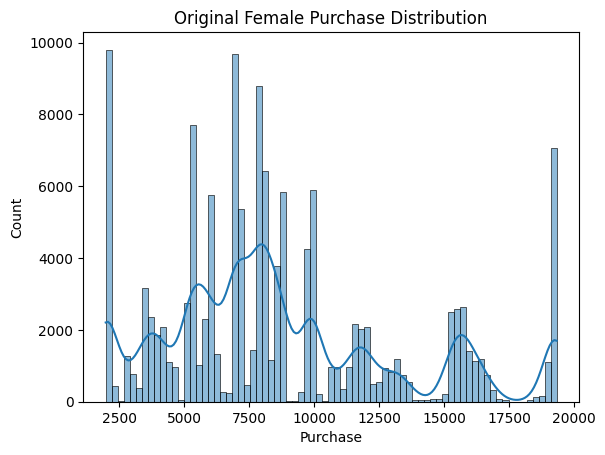

In [ ]:
sns.histplot(data=dfwomen,kde=True).set_title("Original Female Purchase Distribution")
plt.show()

In [ ]:
sample_wmean_300 = [np.mean(dfwomen.sample(300)) for i in range(1000)]
np.mean(sample_wmean_300)

8748.096066666667

In [ ]:
sample_wmean_3000 = [np.mean(dfwomen.sample(3000)) for i in range(1000)]
np.mean(sample_wmean_3000)

8735.545832

In [ ]:
sample_wmean_30000 = [np.mean(dfwomen.sample(30000)) for i in range(1000)]
np.mean(sample_wmean_30000)

8736.320998833335

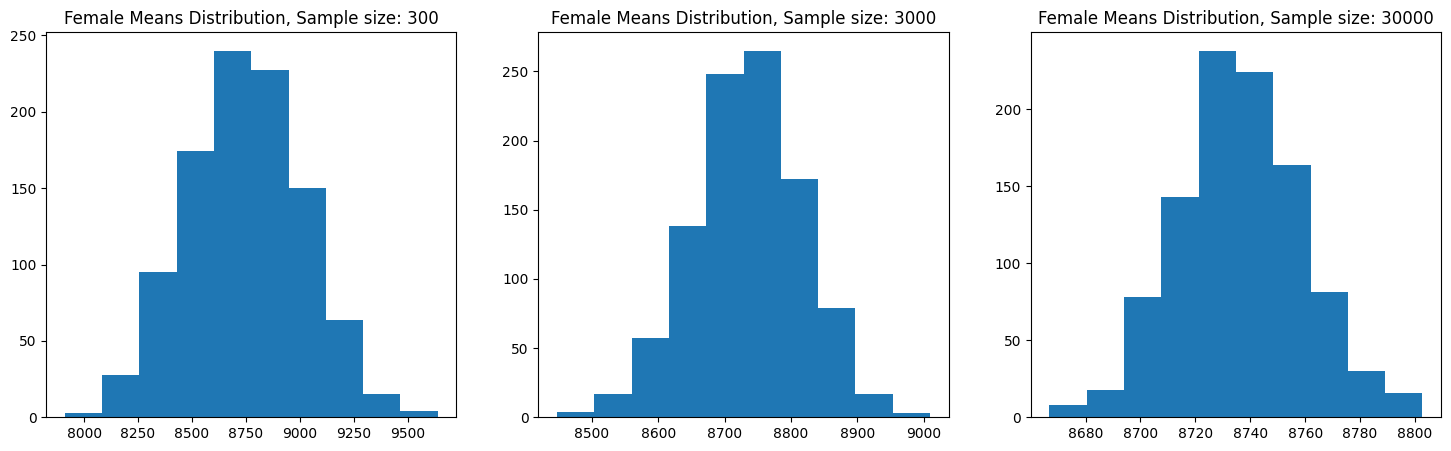

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axis[0].hist(sample_wmean_300)
axis[1].hist(sample_wmean_3000)
axis[2].hist(sample_wmean_30000)
axis[0].set_title("Female Means Distribution, Sample size: 300")
axis[1].set_title("Female Means Distribution, Sample size: 3000")
axis[2].set_title("Female Means Distribution, Sample size: 30000")

plt.show()

INSIGHTS:

1. Male Population Purchase mean is 9427 and Female Population Purchase mean is 8736
2. Male Population 95% Confidence Interval:(9412.239625076156, 9442.240374923844)

   Female Population 95% Confidence Interval:(8712.09131613775, 8760.988683862251)
3. Male Confidence Interval with different Sample sizes:
  *  Sample size of 300 -   (9412.239625076156, 9442.240374923844)
  *  Sample size of 3000 -  (9250.970382155128, 9603.509617844871)
  *  Sample size of 30000 - (9371.498652532275, 9482.981347467725)

  It is Observed that as the Sample size increases width of the Confidence Interval decreases
4. Confidence Intervals in above case are overlapping. It is clearly inferred by comparing lower bound of one interval with upper bound on other interval
5. Variation of Male Distribution means w.r.t Sample sizes:

  Sample size - 300: 9449
  
  Sample size - 3000: 9428
  
  Sample size- 30000: 9427
  
  As the sample size increases the sample distribution mean comes closer to population mean.
6. As the sample size increases the sample dsitribution plot becomes narrower as shown above
7. Female Confidence Interval with different Sample sizes:
  *  Sample size of 300 -   (8216.353432802387, 9256.726567197615)
  *  Sample size of 3000 -  (8572.042563943132, 8901.03743605687)
  *  Sample size of 30000 - (8684.52134328024, 8788.558656719762)
 It is Observed that as the Sample size increases width of the Confidence Interval decreases
8. Confidence Intervals in above case are overlapping. It is clearly inferred by comparing lower bound of one interval with upper bound on other interval
9. Variation of Female Distribution means w.r.t Sample sizes:

  Sample size - 300: 8748

  Sample size - 3000: 8735
  
  Sample size- 30000: 8736
  
  As the sample size increases the sample distribution mean comes closer to population mean.
10. As the sample size increases the sample dsitribution plot becomes narrower as shown above

11. Female Population CI is wider than Male's which signifies lower precision in the estimate and greater uncertainity about the true population parameter





# Marital Status Effect on Purchases - 95% Confidence Interval / Bootstrapping

**Singles Data Confidence Interval & Distribution of Means**

In [ ]:
dfs=df1[df1['Marital_Status']==0]['Purchase']
dfs

0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550056     1984
550059     1984
550062     1984
550064     1984
550066     1984
Name: Purchase, Length: 324731, dtype: int64

In [ ]:
s_mean=round(dfs.mean(),2)
s_mean

9258.82

In [ ]:
s_std=round(dfs.std(),2)
s_std

4864.58

In [ ]:
sn=len(dfs)
sn

324731

In [ ]:
norm.interval(confidence=0.95, loc=s_mean, scale=s_std/np.sqrt(sn))

(9242.08862758751, 9275.55137241249)

In [ ]:
bootstrapped_mean_300 = []
for i in range(1000):
  bootstrapped_sample_300 = np.random.choice(dfs, size=300)
  bootstrapped_mean = np.mean(bootstrapped_sample_300)
  bootstrapped_mean_300.append(bootstrapped_mean)

In [ ]:
x1 = np.percentile(bootstrapped_mean_300, 2.5)
x2 = np.percentile(bootstrapped_mean_300, 97.5)
x1, x2

(8685.259083333334, 9818.048)

In [ ]:
bootstrapped_mean_3000 = []
for i in range(1000):
  bootstrapped_sample_3000 = np.random.choice(dfs, size=3000)
  bootstrapped_mean = np.mean(bootstrapped_sample_3000)
  bootstrapped_mean_3000.append(bootstrapped_mean)

In [ ]:
a1 = np.percentile(bootstrapped_mean_3000, 2.5)
a2 = np.percentile(bootstrapped_mean_3000, 97.5)
a1, a2

(9077.669783333333, 9451.570975)

In [ ]:
bootstrapped_mean_30000 = []
for i in range(1000):
  bootstrapped_sample_30000 = np.random.choice(dfs, size=30000)
  bootstrapped_mean = np.mean(bootstrapped_sample_30000)
  bootstrapped_mean_30000.append(bootstrapped_mean)

In [ ]:
b1 = np.percentile(bootstrapped_mean_30000, 2.5)
b2 = np.percentile(bootstrapped_mean_30000, 97.5)
b1, b2

(9198.300618333333, 9313.426729166666)

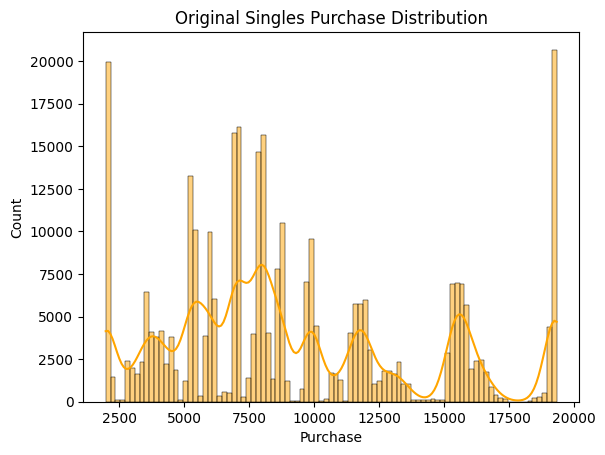

In [ ]:
sns.histplot(data=dfs,color='orange',kde=True).set_title("Original Singles Purchase Distribution")
plt.show()

In [ ]:
np.mean(bootstrapped_mean_300)

9248.303956666667

In [ ]:
np.mean(bootstrapped_mean_3000)

9259.622462666668

In [ ]:
np.mean(bootstrapped_mean_30000)

9256.823681233333

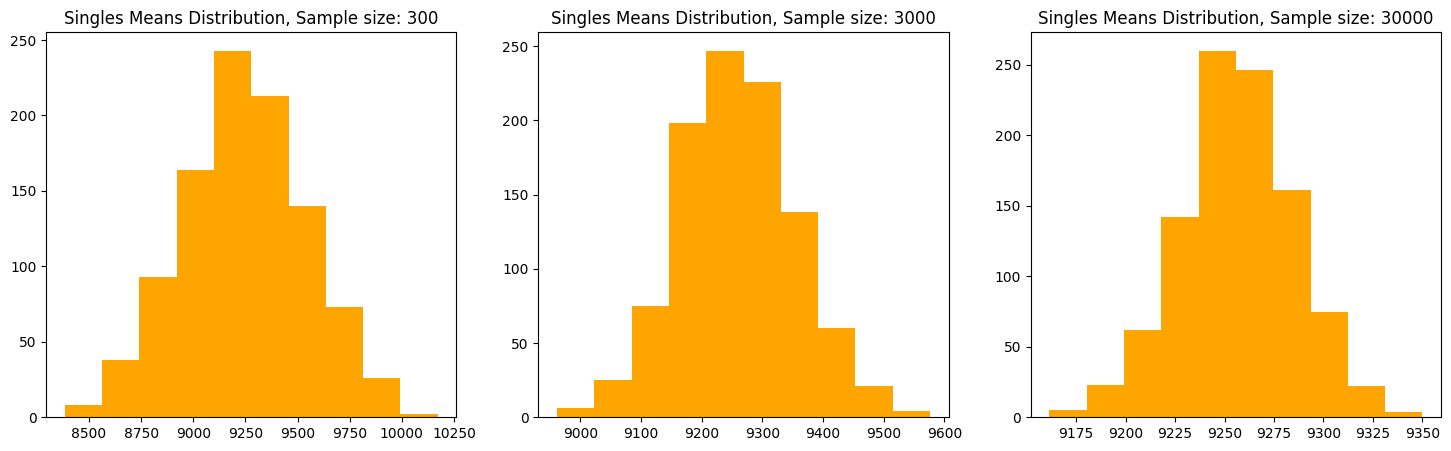

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axis[0].hist(bootstrapped_mean_300,color='orange')
axis[1].hist(bootstrapped_mean_3000,color='orange')
axis[2].hist(bootstrapped_mean_30000,color='orange')
axis[0].set_title("Singles Means Distribution, Sample size: 300")
axis[1].set_title("Singles Means Distribution, Sample size: 3000")
axis[2].set_title("Singles Means Distribution, Sample size: 30000")

plt.show()

**Married Data Confidence Interval & Distribution of Means**

In [ ]:
dfm=df1[df1['Marital_Status']==1]['Purchase']
dfm

6         19215
7         15854
8         15686
9          7871
10         5254
          ...  
550060     1984
550061     1984
550063     1984
550065     1984
550067     1984
Name: Purchase, Length: 225337, dtype: int64

In [ ]:
m_mean=round(dfm.mean(),2)
m_mean

9253.67

In [ ]:
m_std=round(dfm.std(),2)
m_std

4843.49

In [ ]:
mn=len(dfm)
mn

225337

In [ ]:
norm.interval(confidence=0.95, loc=m_mean, scale=m_std/np.sqrt(mn))

(9233.671830529833, 9273.668169470167)

In [ ]:
bootstrapped_m_mean_300 = []
for i in range(1000):
  bootstrapped_m_sample_300 = np.random.choice(dfs, size=300)
  bootstrapped_mean = np.mean(bootstrapped_m_sample_300)
  bootstrapped_m_mean_300.append(bootstrapped_mean)
y1 = np.percentile(bootstrapped_m_mean_300, 2.5)
y2 = np.percentile(bootstrapped_m_mean_300, 97.5)
y1, y2

(8748.176833333333, 9775.885583333333)

In [ ]:
bootstrapped_m_mean_3000 = []
for i in range(1000):
  bootstrapped_m_sample_3000 = np.random.choice(dfs, size=3000)
  bootstrapped_mean = np.mean(bootstrapped_m_sample_3000)
  bootstrapped_m_mean_3000.append(bootstrapped_mean)
c1 = np.percentile(bootstrapped_m_mean_3000, 2.5)
c2 = np.percentile(bootstrapped_m_mean_3000, 97.5)
c1, c2

(9085.649908333333, 9421.532833333333)

In [ ]:
bootstrapped_m_mean_30000 = []
for i in range(1000):
  bootstrapped_m_sample_30000 = np.random.choice(dfs, size=30000)
  bootstrapped_mean = np.mean(bootstrapped_m_sample_30000)
  bootstrapped_m_mean_30000.append(bootstrapped_mean)
d1 = np.percentile(bootstrapped_m_mean_30000, 2.5)
d2 = np.percentile(bootstrapped_m_mean_30000, 97.5)
d1, d2

(9202.92482, 9312.747878333334)

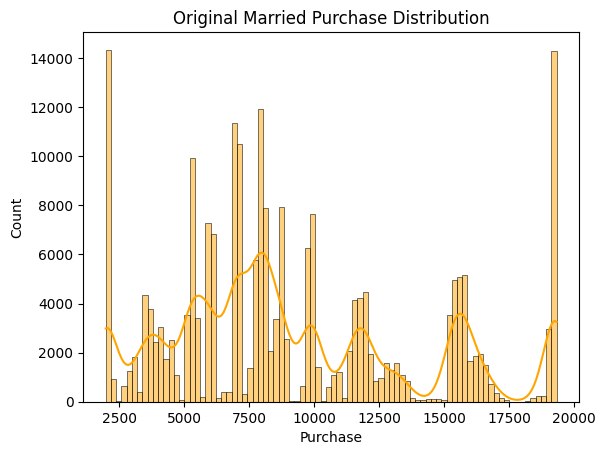

In [ ]:
sns.histplot(data=dfm,color='orange',kde=True).set_title("Original Married Purchase Distribution")
plt.show()

In [ ]:
np.mean(bootstrapped_m_mean_300)

9264.450846666668

In [ ]:
np.mean(bootstrapped_m_mean_3000)

9259.038710333332

In [ ]:
np.mean(bootstrapped_m_mean_30000)

9259.5906152

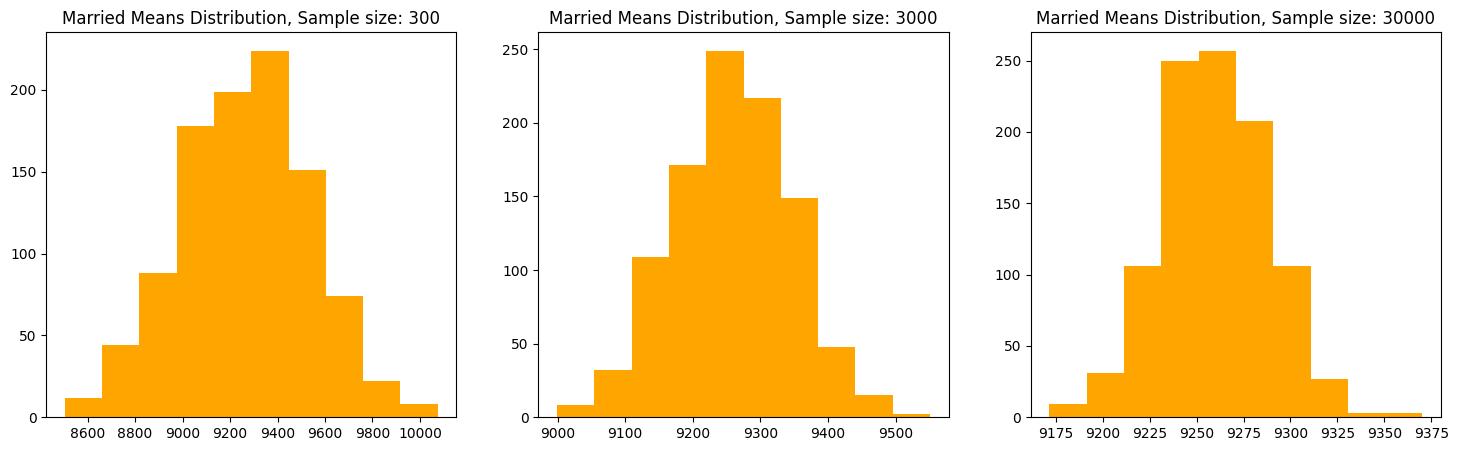

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

axis[0].hist(bootstrapped_m_mean_300,color='orange')
axis[1].hist(bootstrapped_m_mean_3000,color='orange')
axis[2].hist(bootstrapped_m_mean_30000,color='orange')
axis[0].set_title("Married Means Distribution, Sample size: 300")
axis[1].set_title("Married Means Distribution, Sample size: 3000")
axis[2].set_title("Married Means Distribution, Sample size: 30000")

plt.show()

INSIGHTS:

1. Singles Population Purchase mean is 9258 and Married Population Purchase mean is 9253
2. Singles Population Confidence 95% Interval:(9242.08862758751, 9275.55137241249)

   Married Population Confidence 95% Interval:(9233.671830529833, 9273.668169470167)
3. Singles Confidence Interval with different Sample sizes:
  *  Sample size of 300 -   (8691.985083333333, 9805.97075)
  *  Sample size of 3000 -  (9090.470683333333, 9423.650783333334)
  *  Sample size of 30000 - (9202.758979166667, 9309.495452500001)

  It is Observed that as the Sample size increases width of the Confidence Interval decreases
4. Confidence Intervals in above case are overlapping. It is clearly inferred by comparing lower bound of one interval with upper bound on other interval
5. Variation of Singles Distribution means w.r.t Sample sizes:

  Sample size - 300: 9253
  
  Sample size - 3000: 9255
  
  Sample size- 30000: 9257
  
  As the sample size increases, the sample distribution mean comes closer to population mean.
6. As the sample size increases, the sample dsitribution plot becomes narrower as shown above
7. Married Confidence Interval with different Sample sizes:
  *  Sample size of 300 -   (8740.33475, 9805.124333333333)
  *  Sample size of 3000 -  (9087.528275, 9427.935141666667)
  *  Sample size of 30000 - (9202.58072, 9315.308989166668)
 It is Observed that as the Sample size increases width of the Confidence Interval decreases
8. Confidence Intervals in above case are overlapping. It is clearly inferred by comparing lower bound of one interval with upper bound on other interval
9. Variation of Married Distribution means w.r.t Sample sizes:

  Sample size - 300: 9265

  Sample size - 3000: 9254
  
  Sample size- 30000: 9258
  
  As the sample size increases the sample distribution mean comes closer to population mean.
10. As the sample size increases the sample dsitribution plot becomes narrower as shown above

11. Married Population CI is slightly wider than Single's which signifies lower precision in the estimate and greater uncertainity about the true population parameter


# Age Effect on Purchases - Confidence Interval / CLT

In [ ]:
df1['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

**Age Group 0-17**

In [ ]:
g17=df1[df1['Age']=='0-17']['Purchase']
mn_17=np.mean(g17)
std_17=np.std(g17)
n17=len(g17)
mn_17,std_17,n17


(8940.64905310555, 4940.4336770263235, 15102)

In [ ]:
norm.interval(confidence=0.95,loc=mn_17,scale=std_17/np.sqrt(n17))

(8861.854548111229, 9019.44355809987)

In [ ]:
n17_300=300
n17_3000=3000
print(norm.interval(confidence=0.95,loc=mn_17,scale=std_17/np.sqrt(n17_300)))
print(norm.interval(confidence=0.95,loc=mn_17,scale=std_17/np.sqrt(n17_3000)))

(8381.596626198303, 9499.701480012796)
(8763.861153058378, 9117.43695315272)


In [ ]:
sample_g17_300 = [np.mean(g17.sample(300)) for i in range(1000)]
sample_g17_3000 = [np.mean(g17.sample(3000)) for i in range(1000)]
print(np.mean(sample_g17_300))
print(np.mean(sample_g17_3000))

8927.314526666667
8937.245701


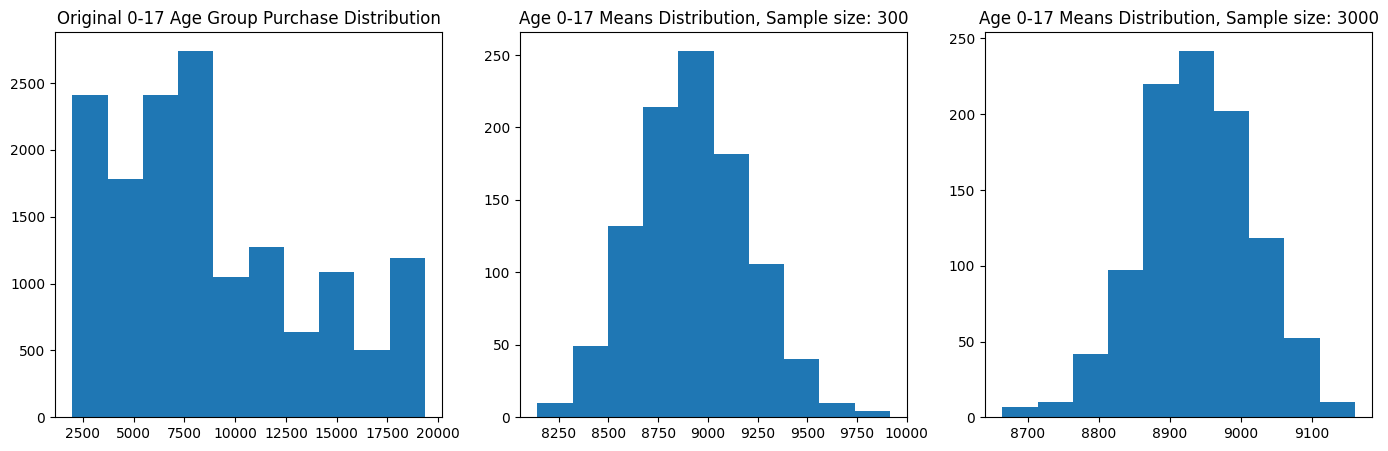

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g17)
axis[1].hist(sample_g17_300)
axis[2].hist(sample_g17_3000)
axis[0].set_title('Original 0-17 Age Group Purchase Distribution')
axis[1].set_title("Age 0-17 Means Distribution, Sample size: 300")
axis[2].set_title("Age 0-17 Means Distribution, Sample size: 3000")
plt.show()

**Age Group 18-25**

In [ ]:
g25=df1[df1['Age']=='18-25']['Purchase']
mn_25=np.mean(g25)
std_25=np.std(g25)
n25=len(g25)
mn_25,std_25,n25

(9169.010977322898, 4889.406153689979, 99660)

In [ ]:
norm.interval(confidence=0.95,loc=mn_25,scale=std_25/np.sqrt(n25))

(9138.65503182672, 9199.366922819076)

In [ ]:
n25_3000=3000
n25_30000=30000
print(norm.interval(confidence=0.95,loc=mn_25,scale=std_25/np.sqrt(n25_3000)))
print(norm.interval(confidence=0.95,loc=mn_25,scale=std_17/np.sqrt(n25_30000)))

(8994.049040194162, 9343.972914451633)
(9113.105734632172, 9224.916220013623)


In [ ]:
sample_g25_3000 = [np.mean(g25.sample(3000)) for i in range(1000)]
sample_g25_30000 = [np.mean(g25.sample(30000)) for i in range(1000)]
print(np.mean(sample_g25_3000))
print(np.mean(sample_g25_30000))

9170.859580333334
9168.488881933336


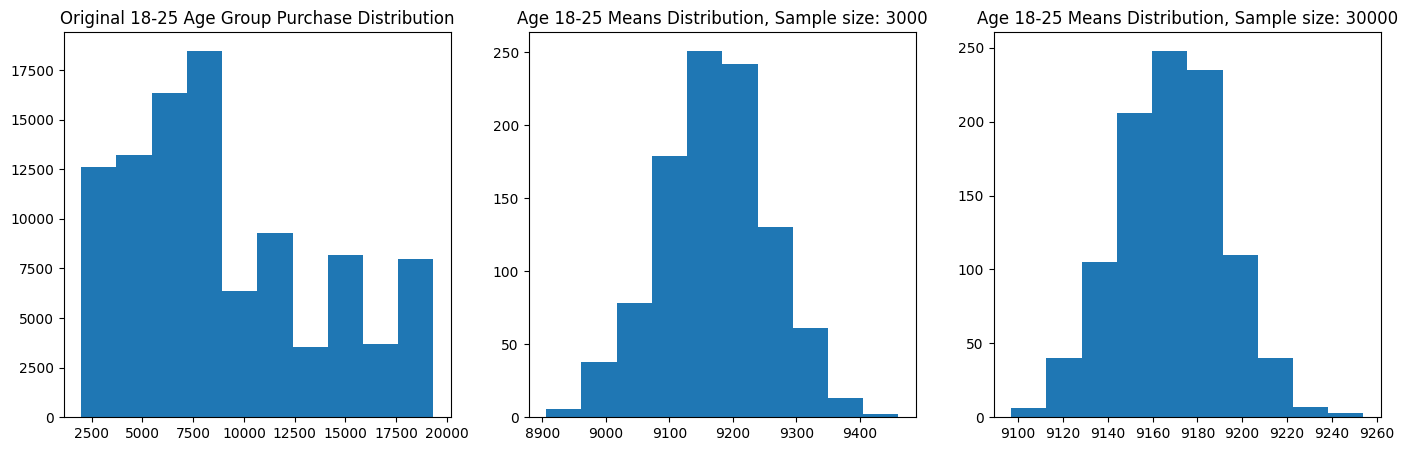

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g25)
axis[1].hist(sample_g25_3000)
axis[2].hist(sample_g25_30000)
axis[0].set_title('Original 18-25 Age Group Purchase Distribution')
axis[1].set_title("Age 18-25 Means Distribution, Sample size: 3000")
axis[2].set_title("Age 18-25 Means Distribution, Sample size: 30000")
plt.show()

**Age Group 26-35**

In [ ]:
g35=df1[df1['Age']=='26-35']['Purchase']
mn_35=np.mean(g35)
std_35=np.std(g35)
n35=len(g35)
mn_35,std_35,n35

(9243.780119041656, 4855.1809978563815, 219587)

In [ ]:
norm.interval(confidence=0.95,loc=mn_35,scale=std_35/np.sqrt(n35))

(9223.472911701547, 9264.087326381765)

In [ ]:
n35_3000=3000
n35_30000=30000
print(norm.interval(confidence=0.95,loc=mn_35,scale=std_35/np.sqrt(n35_3000)))
print(norm.interval(confidence=0.95,loc=mn_35,scale=std_35/np.sqrt(n35_30000)))

(9070.042890880626, 9417.517347202685)
(9188.839583506337, 9298.720654576975)


In [ ]:
sample_g35_3000 = [np.mean(g35.sample(3000)) for i in range(1000)]
sample_g35_30000 = [np.mean(g35.sample(30000)) for i in range(1000)]
print(np.mean(sample_g35_3000))
print(np.mean(sample_g35_30000))

9241.592410666666
9242.771761733335


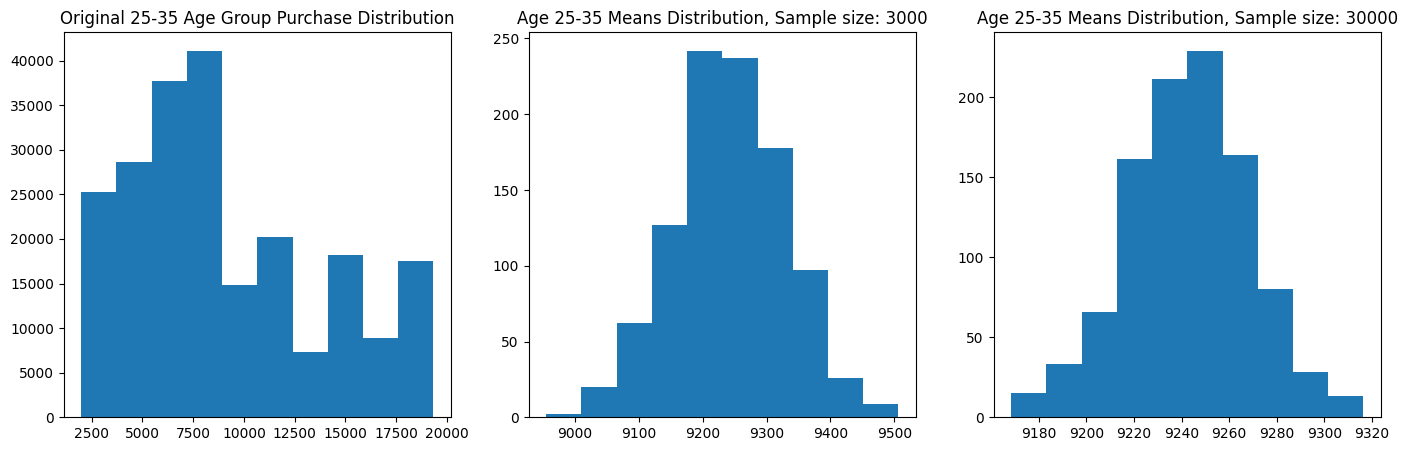

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g35)
axis[1].hist(sample_g35_3000)
axis[2].hist(sample_g35_30000)
axis[0].set_title('Original 25-35 Age Group Purchase Distribution')
axis[1].set_title("Age 25-35 Means Distribution, Sample size: 3000")
axis[2].set_title("Age 25-35 Means Distribution, Sample size: 30000")
plt.show()

**Age Group 36-45**

In [ ]:
g45=df1[df1['Age']=='36-45']['Purchase']
mn_45=np.mean(g45)
std_45=np.std(g45)
n45=len(g45)
mn_45,std_45,n45

(9322.92190922891, 4847.575809950681, 110013)

In [ ]:
norm.interval(confidence=0.95,loc=mn_45,scale=std_45/np.sqrt(n45))

(9294.276785879063, 9351.567032578756)

In [ ]:
n45_3000=3000
n45_30000=30000
print(norm.interval(confidence=0.95,loc=mn_45,scale=std_45/np.sqrt(n45_3000)))
print(norm.interval(confidence=0.95,loc=mn_45,scale=std_45/np.sqrt(n45_30000)))

(9149.456824221135, 9496.386994236684)
(9268.06743291498, 9377.776385542838)


In [ ]:
sample_g45_3000 = [np.mean(g45.sample(3000)) for i in range(1000)]
sample_g45_30000 = [np.mean(g45.sample(30000)) for i in range(1000)]
print(np.mean(sample_g45_3000))
print(np.mean(sample_g45_30000))

9319.595611
9323.977863


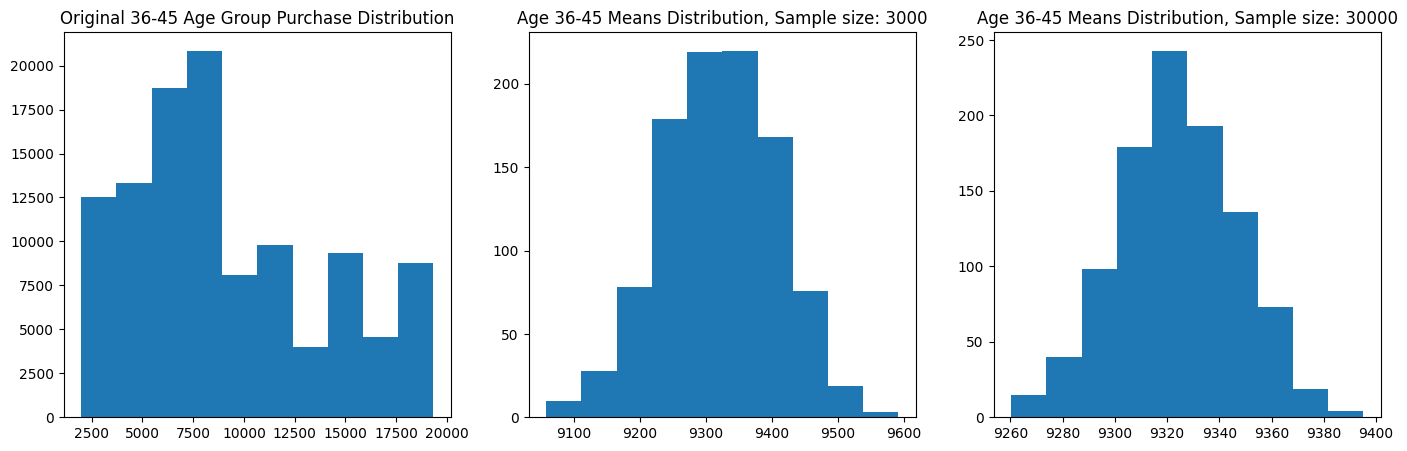

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g45)
axis[1].hist(sample_g45_3000)
axis[2].hist(sample_g45_30000)
axis[0].set_title('Original 36-45 Age Group Purchase Distribution')
axis[1].set_title("Age 36-45 Means Distribution, Sample size: 3000")
axis[2].set_title("Age 36-45 Means Distribution, Sample size: 30000")
plt.show()

**Age Group 46-50**

In [ ]:
g50=df1[df1['Age']=='46-50']['Purchase']
mn_50=np.mean(g50)
std_50=np.std(g50)
n50=len(g50)
mn_50,std_50,n50

(9204.211483337345, 4785.889795462082, 45701)

In [ ]:
norm.interval(confidence=0.95,loc=mn_50,scale=std_50/np.sqrt(n50))

(9160.333371235687, 9248.089595439003)

In [ ]:
n50_300=300
n50_3000=3000
print(norm.interval(confidence=0.95,loc=mn_50,scale=std_50/np.sqrt(n50_300)))
print(norm.interval(confidence=0.95,loc=mn_50,scale=std_50/np.sqrt(n50_3000)))

(8662.647021596784, 9745.775945077907)
(9032.953763447016, 9375.469203227674)


In [ ]:
sample_g50_300 = [np.mean(g50.sample(300)) for i in range(1000)]
sample_g50_3000 = [np.mean(g50.sample(3000)) for i in range(1000)]
print(np.mean(sample_g50_300))
print(np.mean(sample_g50_3000))

9207.932113333332
9203.316165999999


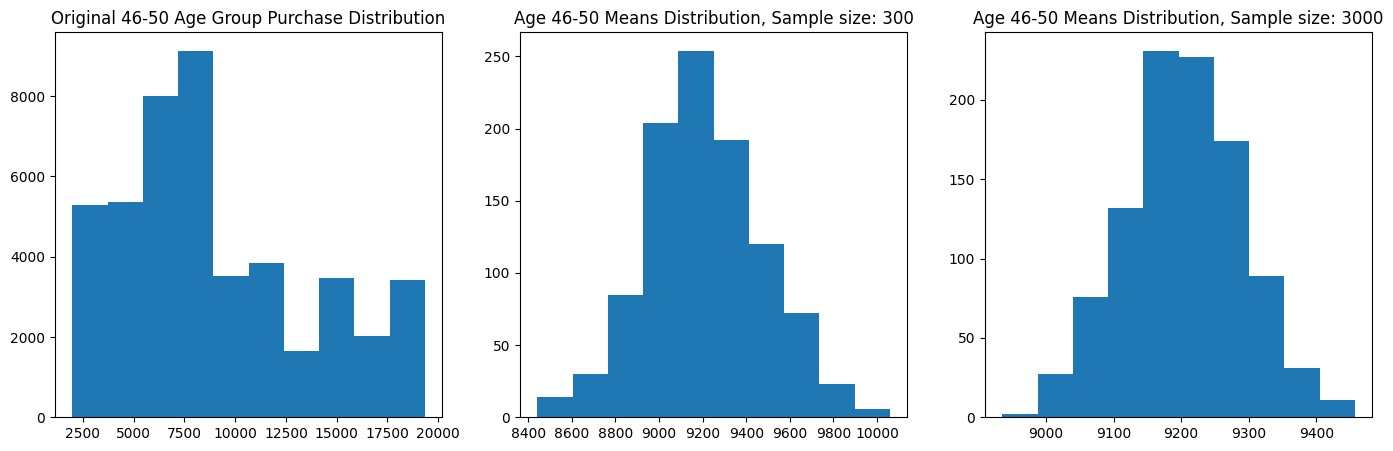

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g50)
axis[1].hist(sample_g50_300)
axis[2].hist(sample_g50_3000)
axis[0].set_title('Original 46-50 Age Group Purchase Distribution')
axis[1].set_title("Age 46-50 Means Distribution, Sample size: 300")
axis[2].set_title("Age 46-50 Means Distribution, Sample size: 3000")
plt.show()

**Age Group 51-55**

In [ ]:
g55=df1[df1['Age']=='51-55']['Purchase']
mn_55=np.mean(g55)
std_55=np.std(g55)
n55=len(g55)
mn_55,std_55,n55

(9514.863250305187, 4873.566375511284, 38501)

In [ ]:
norm.interval(confidence=0.95,loc=mn_55,scale=std_55/np.sqrt(n55))

(9466.18230852783, 9563.544192082543)

In [ ]:
n55_300=300
n55_3000=3000
print(norm.interval(confidence=0.95,loc=mn_55,scale=std_55/np.sqrt(n55_300)))
print(norm.interval(confidence=0.95,loc=mn_55,scale=std_55/np.sqrt(n55_3000)))

(8963.377431844998, 10066.349068765376)
(9340.468121943553, 9689.25837866682)


In [ ]:
sample_g55_300 = [np.mean(g55.sample(300)) for i in range(1000)]
sample_g55_3000 = [np.mean(g55.sample(3000)) for i in range(1000)]
print(np.mean(sample_g55_300))
print(np.mean(sample_g55_3000))

9497.581559999999
9513.709314


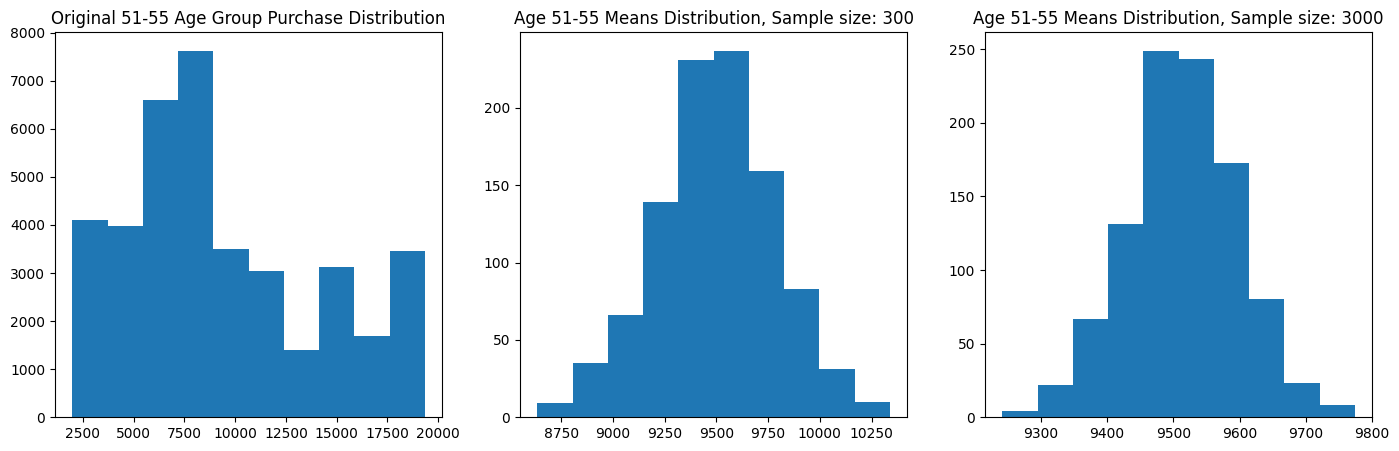

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g55)
axis[1].hist(sample_g55_300)
axis[2].hist(sample_g55_3000)
axis[0].set_title('Original 51-55 Age Group Purchase Distribution')
axis[1].set_title("Age 51-55 Means Distribution, Sample size: 300")
axis[2].set_title("Age 51-55 Means Distribution, Sample size: 3000")
plt.show()

**Age Group 55+**

In [ ]:
g55p=df1[df1['Age']=='55+']['Purchase']
mn_55p=np.mean(g55p)
std_55p=np.std(g55p)
n55p=len(g55p)
mn_55p,std_55p,n55p

(9327.796549479166, 4779.824746706831, 21504)

In [ ]:
norm.interval(confidence=0.95,loc=mn_55p,scale=std_55p/np.sqrt(n55p))

(9263.911323001412, 9391.68177595692)

In [ ]:
n55p_300=300
n55p_3000=3000
print(norm.interval(confidence=0.95,loc=mn_55p,scale=std_55p/np.sqrt(n55p_300)))
print(norm.interval(confidence=0.95,loc=mn_55p,scale=std_55p/np.sqrt(n55p_3000)))

(8786.918400003397, 9868.674698954936)
(9156.755860583122, 9498.83723837521)


In [ ]:
sample_g55p_300 = [np.mean(g55p.sample(300)) for i in range(1000)]
sample_g55p_3000 = [np.mean(g55p.sample(3000)) for i in range(1000)]
print(np.mean(sample_g55p_300))
print(np.mean(sample_g55p_3000))

9356.813440000002
9325.491602333334


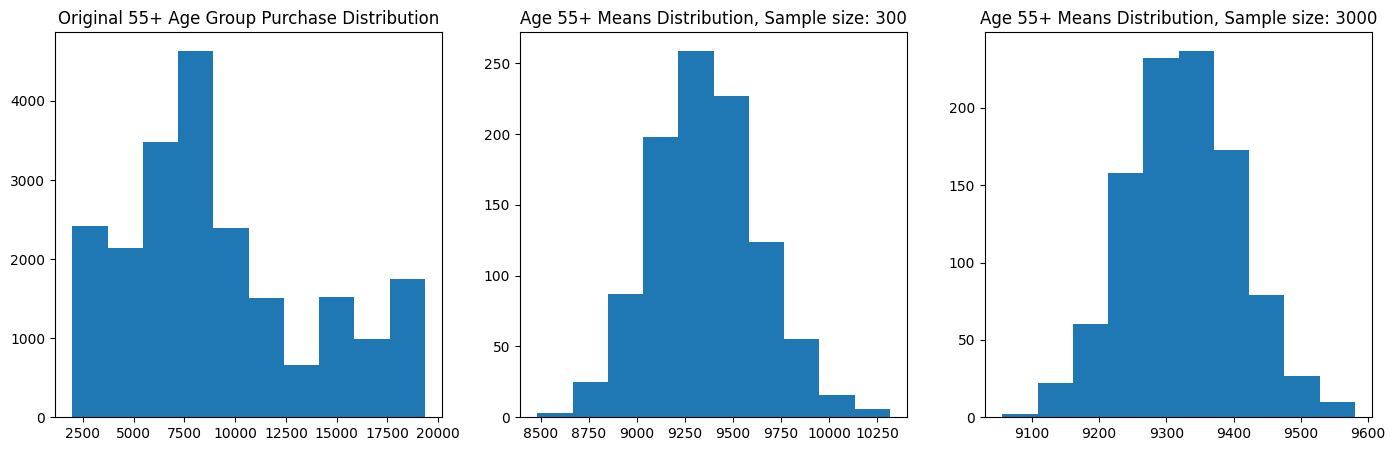

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(17, 5))
axis[0].hist(g55p)
axis[1].hist(sample_g55p_300)
axis[2].hist(sample_g55p_3000)
axis[0].set_title('Original 55+ Age Group Purchase Distribution')
axis[1].set_title("Age 55+ Means Distribution, Sample size: 300")
axis[2].set_title("Age 55+ Means Distribution, Sample size: 3000")
plt.show()

INSIGHTS:

1. Age Group 0-17:
  
  Confidence Interval- (8861.85, 9019.44)
  
  Avg. Purchase- 8940

2. Age Group 18-25:

  Confidence Interval- (9138.65, 9199.36)

  Avg. Purchase- 9169

3. Age Group 26-35:

  Confidence Interval- (9223.78, 9264.08)

  Avg. Purchase- 9243

4. Age Group 36-45:

  Confidence Interval- (9294.27, 9351.56)

  Avg. Purchase- 9322

5. Age Group 46-50:

  Confidence Interval- (9160.33, 9248.08)

  Avg. Purchase- 9204

6. Age Group 51-55:

  Confidence Interval- (9466.18, 9563.54)

  Avg. Purchase- 9514

7. Age Group 55+:

  Confidence Interval- (9263.91, 9391.68)

  Avg. Purchase- 9327

8. Avg. Purchase is the highest for 51-55 age group

9. It is observed that as the sample size increases, width of the confidence interval decreases

10. In most of the cases of different sample sizes, confidence intervals are overlapping

11. As the sample size increases, the sample mean gets closer to the population mean and the shape of the distribution of the means get narrower

#Understanding Correlation / Pairplot

In [ ]:
df.corr()

<ipython-input-231-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-232-f6412ee67fb3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


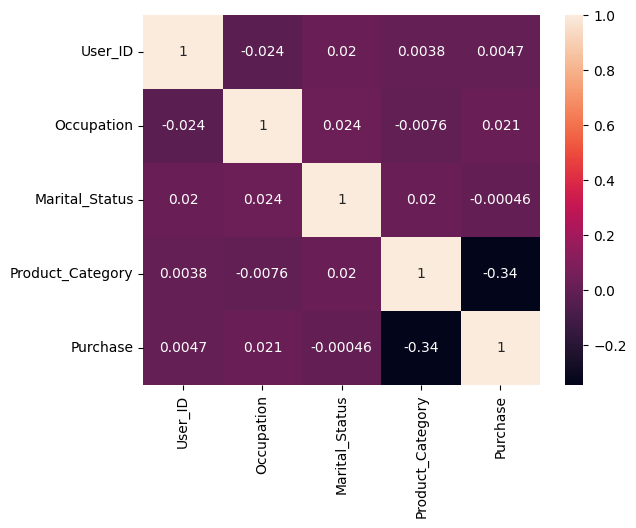

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()

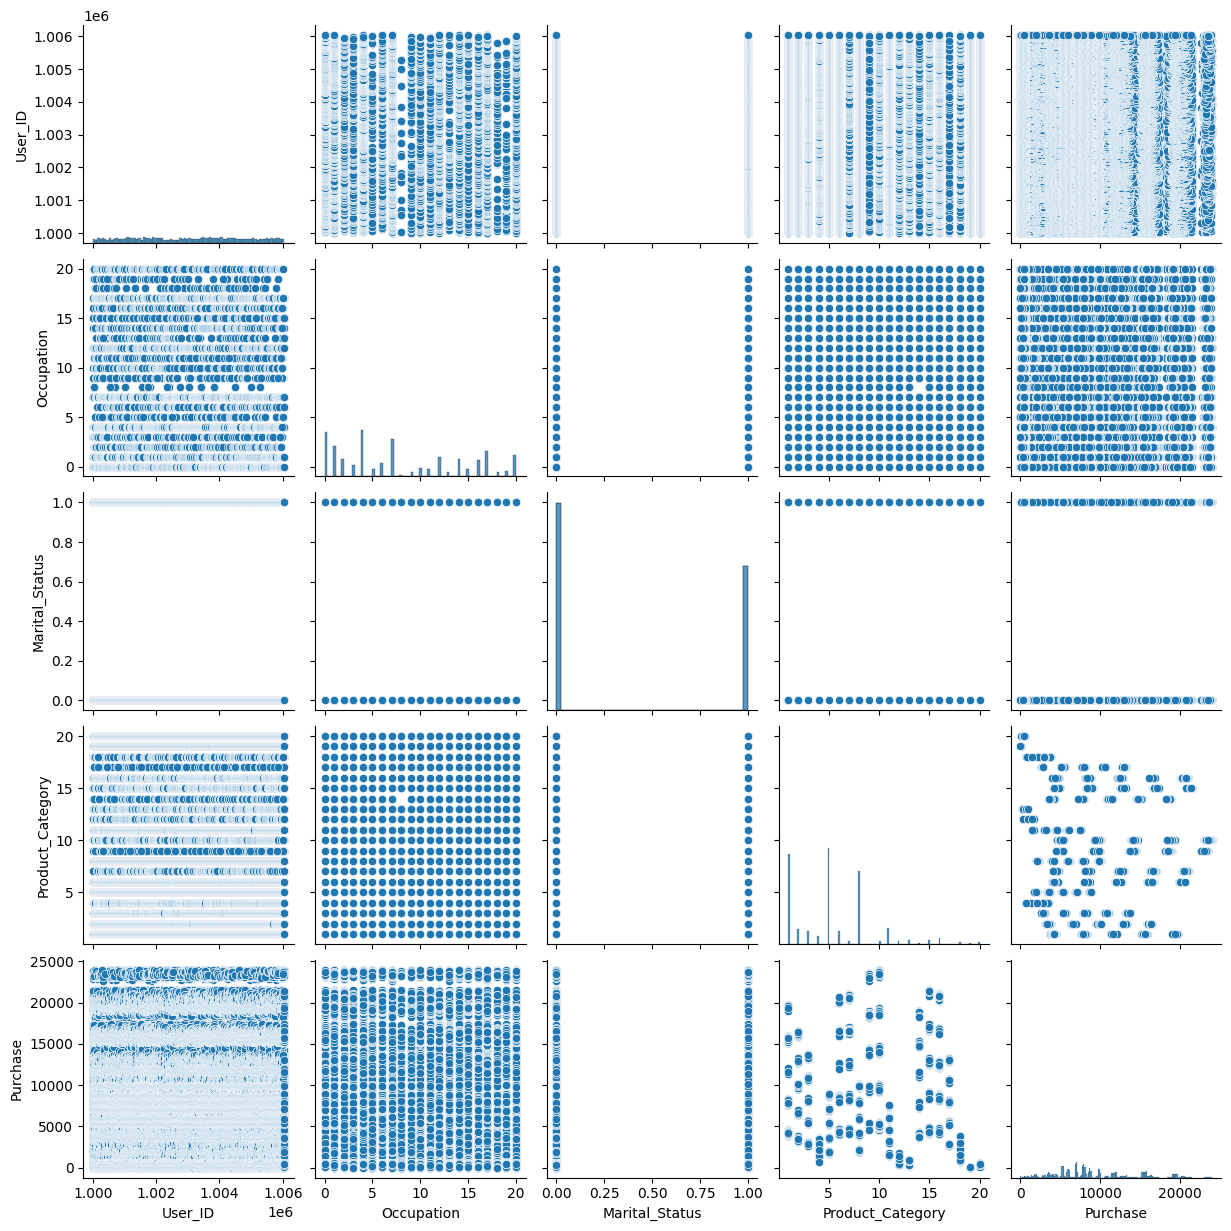

In [ ]:
sns.pairplot(data=df)

INSIGHTS:

1. From correlation function and the heatmap , it is observed that there is no significant correlation among any pair of attributes.
2. Pairplot and Heatmap show some correlation among few attributes but it is not coming out significantly.

#Answering Specific Questions

**Are women spending more money per transaction than men? Why or Why not?**

No, Women on an average spending 8736 which is less w.r.t Men who are spending 9427 on an average

The data shows that 75% of the orders are purchased by Men and 25% by Women. Possible reasons can be that Walmart have got more products which male dominating or Men at that location have more purchasing power than Women.


**Confidence intervals and distribution of the mean of the expenses by female and male customers**

Male Population 95% Confidence Interval:(9412.23, 9442.24)

Female Population 95% Confidence Interval:(8712.09, 8760.98)

Distribution of means in case of various samples sizes alongwith insights is shared in detail above

**Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?**

No, CI of average male and female spending is not overlapping.

The average spending of men per transaction is 9427 and for women its 8736.  

This information can be leveraged the following way:
1. We can look to increase this amount individually for men and women by introducing relevant products at attractive prices
2. Since women average purchase amount is less, we can introduce more women centric products to increase the average spending
3. The average spending by men and women give important information on the purchasing power in that location. Depending on this information we can introduce products at a target price which will definitely help increase revenue


**Results when the same activity is performed for Married vs Unmarried**

Singles Population Purchase mean is 9258 and Married Population Purchase mean is 9253

Singles Population 95% Confidence Interval:(9242.08, 9275.55)

Married Population 95% Confidence Interval:(9233.67, 9273.66)

CI are overlapping in this case and average purchase per transaction is almost same which infers similarity in buying behaviour of singles and married



**Results when the same activity is performed for Age**

1. Age Group 0-17: (8861.85, 9019.44)  Avg. Purchase- 8940
2. Age Group 18-25:(9138.65, 9199.36)  Avg. Purchase- 9169
3. Age Group 26-35:(9223.78, 9264.08)  Avg. Purchase- 9243
4. Age Group 36-45:(9294.27, 9351.56)  Avg. Purchase- 9322
5. Age Group 46-50:(9160.33, 9248.08)  Avg. Purchase- 9204
6. Age Group 51-55:(9466.18, 9563.54)  Avg. Purchase- 9514
7. Age Group 55+:  (9263.91, 9391.68)  Avg. Purchase- 9327

CI is overlapping in this case which shows similar buying behaviour across age groups with average spending by age group 51-55 being highest


#Recommendations

1.	Currently there are unique 5891 customers. We need to look into our marketing efforts to increase this customer base w.r.t population of that location and potential in that region
2.	75% of the orders are coming from male population and 25% from female. Males mostly buying product category 1 followed by 5 and 8. This figure shows the potential to bring in more variety of male centric products so as to retain our customer base. Definitely, improvement needed for female category who is currently buying mostly product category 5 followed by 8 and 1, in terms of identification of right products and marketing strategy for them so that this share can also increase
3.	40% of the orders are from the age group 26-35 who is mostly buying product category 5, which directly indicates how critical it is to keep supply of relevant products for this group at attractive pricing so that it continues to be the revenue generator for the company
4.	Customers with occupation no. 4 are 13% closely followed by 0 and 7. It is an indicator of what kind of corporate offers and product range to have to increase revenue from this section of customer
5.	We need to devise a marketing strategy targeting customers from each category of city. Current data shows City category B is leading with 42% followed by C and A. We need to understand the demography of that region and plan marketing efforts accordingly to increase revenue
6.	Singles are buying more with 59% followed by married with 41%. We can introduce more products targeting Singles in a specific price w.r.t purchasing power
7.	Top of the product category is 5 followed by 1. It is an indicator of the demography of that region and the likes of that region. For ex. If category including books are selling most, we can introduce more products near that category like stationary products which definitely find a pull in that market and will help increase revenue as well
8.	The average spending of men per transaction is 9427 and for women its 8736. We can look to increase this amount individually for men and women by introducing relevant products at attractive prices

